# **CUSTOMER CHURN PREDICTION**

##### Customer churn is defined as the rate which customers cancel a subscription to a service they have been using. Customer churn prediction is important for many business because acquiring new clients often costs more than retaining existing ones. In this project, I tried to use Logistic Regression, XGBoost, Random Forest, and SVM.

## **1. IMPORTING LIBRARIES**

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 10.2 MB/s 
     |████████████████████████████████| 1.6 MB 51.3 MB/s 


In [ ]:
!pip install pyyaml h5py 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install missingpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 3.7 MB/s 


In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.1 MB/s 


In [ ]:
# Standard libraries
import pandas as pd
import numpy as np

# Libraries for data visualization
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for preprocessing
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.pipeline import Pipeline

# Libraries for model
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

# Libraries for model evaluation
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.metrics import AUC

# Libary of hyperparameter tuning
import keras_tuner 
from keras_tuner import BayesianOptimization
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## **2. LOADING DATASET**

In [ ]:
desc = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name = 'Data Dict', header=1, usecols=[1,2,3])
df = pd.read_excel('/content/E Commerce Dataset.xlsx', sheet_name = 'E Comm')

# Let's look at the data description
desc

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


##### There are 20 features in this dataset



In [ ]:
# Look at the data
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Drop unnecessary column
df = df.drop(columns = 'CustomerID')

# Check datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

##### It can be seen that there are **5,630 customers** in this dataset. However, there are missing values in seven independent variables. I'll handle missing values later in data preprocessing. 

## **3. EXPLORATORY DATA ANALYSIS**

### **CUSTOMER CHURN**

In [ ]:
# make new dataframe
churn = pd.DataFrame(df.Churn.value_counts()).reset_index().rename(columns = {'index' : 'Churn', 'Churn' : 'Count'})


# make a pie chart
fig = px.pie(churn, values = 'Count', names = 'Churn')
fig.update_traces(textposition = 'inside', textinfo = 'percent + label', marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer churn',  title_x = 0.5, title_font_size = 32, title_font_family = 'Calibri', title_font_color = 'black',
                  showlegend = False)
                  
fig.show()

##### We clearly have imbalanced data. From the above pie chart, there are more customers who still use the service from the e-commerce platform. Remained customers account for **83.2%%** which is 5 times higher compared to churned customers. 

### **UNIVARIATE ANALYSIS**

#### **Affects of gender and marital status on customer churn**

In [ ]:
# make new dataframe
def new_df(df=df,col = str ) :
  new_df = df.groupby([col, 'Churn']).agg({'Churn' : 'count'}).rename(columns = {'Churn' : 'count'}).reset_index()
  cond = new_df['Churn'] == 0
  new_df.loc[cond, 'Churn'] = 'No'
  cond = new_df['Churn'] == 1
  new_df.loc[cond, 'Churn'] = 'Yes'
  return new_df

In [ ]:
# make a gender dataframe
gender = new_df(df, 'Gender')

# make a marital dataframe
marital = new_df(df, 'MaritalStatus')

# visualization
specs = [[{'type':'sunburst'}] * 2] * 1
fig = make_subplots(rows = 1, cols = 2, specs = specs)

fig.add_trace(px.sunburst(gender, path = ['Gender', 'Churn'], values = 'count', color = 'Gender').data[0], row=1, col=1)
fig.add_trace(px.sunburst(marital, path = ['MaritalStatus', 'Churn'], values = 'count', color = 'MaritalStatus').data[0], row=1, col=2)
fig.update_traces(textinfo = 'label + percent parent')
fig.update_layout(title_text='Distribution of Customer Churn by Gender and Marital Status', title_font_family = 'Calibri Black', 
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5,
                  annotations=[dict(text='Gender',x=0.2,y=1.08, font_size=15, showarrow=False),
                               dict(text='Marital Status',x=0.83,y=1.08, font_size=15, showarrow=False)])

fig.show()

#### **Affects of payment mode and order categories on customer churn**

In [ ]:
# make a payment dataframe
pay = new_df(df, 'PreferredPaymentMode')

# make an order dataframe
order = new_df(df, 'PreferedOrderCat')

# visualization
specs = [[{'type':'sunburst'}] * 2] * 1
fig = make_subplots(rows = 1, cols = 2, specs = specs)

fig.add_trace(px.sunburst(pay, path = ['PreferredPaymentMode', 'Churn'], values = 'count', color = 'PreferredPaymentMode').data[0], row=1, col=1)
fig.add_trace(px.sunburst(order, path = ['PreferedOrderCat', 'Churn'], values = 'count', color = 'PreferedOrderCat').data[0], row=1, col=2)

fig.update_traces(textinfo = 'label + percent parent')
fig.update_layout(title_text='Distribution of Customer Churn by  Payment Mode and Order Categories', title_font_family = 'Calibri Black', 
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5,
                  annotations=[dict(text='Payment Mode',x=0.17,y=1.08, font_size=15, showarrow=False),
                               dict(text='Order Categories',x=0.83,y=1.08, font_size=15, showarrow=False)])

fig.show()


#### **Affect of satisfaction score and comlain on customer churn**

In [ ]:
# make a satisfaction score dataframe
score = new_df(df, 'SatisfactionScore')

# make an complain dataframe
complain = new_df(df, 'Complain')

# visualization
specs = [[{'type':'sunburst'}] * 2] * 1
fig = make_subplots(rows = 1, cols = 2, specs = specs)

fig.add_trace(px.sunburst(score, path = ['SatisfactionScore', 'Churn'], values = 'count', color = 'SatisfactionScore').data[0], row=1, col=1)
fig.add_trace(px.sunburst(complain, path = ['Complain', 'Churn'], values = 'count', color = 'Complain').data[0], row=1, col=2)

fig.update_traces(textinfo = 'label + percent parent')
fig.update_layout(title_text='Distribution of Customer Churn by Satisfaction Score and Complain', title_font_family = 'Calibri Black', 
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5,
                  annotations=[dict(text='Satisfaction Score',x=0.17,y=1.08, font_size=15, showarrow=False),
                               dict(text='Complain',x=0.83,y=1.08, font_size=15, showarrow=False)])

fig.show()

#### **Affect of city tier and preferred login device on customer churn**

In [ ]:
# make a satisfaction score dataframe
city = new_df(df, 'CityTier')

# make an complain dataframe
device = new_df(df, 'PreferredLoginDevice')

# visualization
specs = [[{'type':'sunburst'}] * 2] * 1
fig = make_subplots(rows = 1, cols = 2, specs = specs)

fig.add_trace(px.sunburst(city, path = ['CityTier', 'Churn'], values = 'count', color = 'CityTier').data[0], row=1, col=1)
fig.add_trace(px.sunburst(device, path = ['PreferredLoginDevice', 'Churn'], values = 'count', color = 'PreferredLoginDevice').data[0], row=1, col=2)

fig.update_traces(textinfo = 'label + percent parent')
fig.update_layout(title_text='Distribution of Customer Churn by City Tier and Preferred Login Device', title_font_family = 'Calibri Black', 
                  title_font_color = '#221f1f', title_font_size = 22, title_x = 0.5,
                  annotations=[dict(text='City Tier',x=0.2,y=1.08, font_size=15, showarrow=False),
                               dict(text='Coupon Used',x=0.83,y=1.08, font_size=15, showarrow=False)])

fig.show()

##### Based on categorical features, it can be concluded that :
#####1. There are more male customers than females, but **male customers are likely to churn.**
#####2. Married people account for half of total customers, followed by single people (32%) and divorced people (15%). **Single people are most likely to not using the e-commerce anymore.**
#####3. Although the percentage of COD is only 6%, people who pay products by COD (Cash on Delivery) are most likely to churn .
#####4. Most of customers buy electronics (laptops+accecories and mobile phones) in the e-commerce platform. **Customers purchasing mobile phones tend to leave the service**. It needs more attention since the percentage of customers purchasing mobile phones is high. 
#####5. It is quite surprising because 264 people out of 1,108 people (24%) who give satisfaction **score of 5 are likely to churn**. This percentage is the highest than churned customers among customers who give other scores 
#####6. **Customers who give complaints are more likely to churn.**
#####7. Customers who live in city tier of 3 are more likely to churn.
#####8. Customers who access to the e-commerce by computer and phone are more likely to churn.

#### **Distribution of numerical variables**

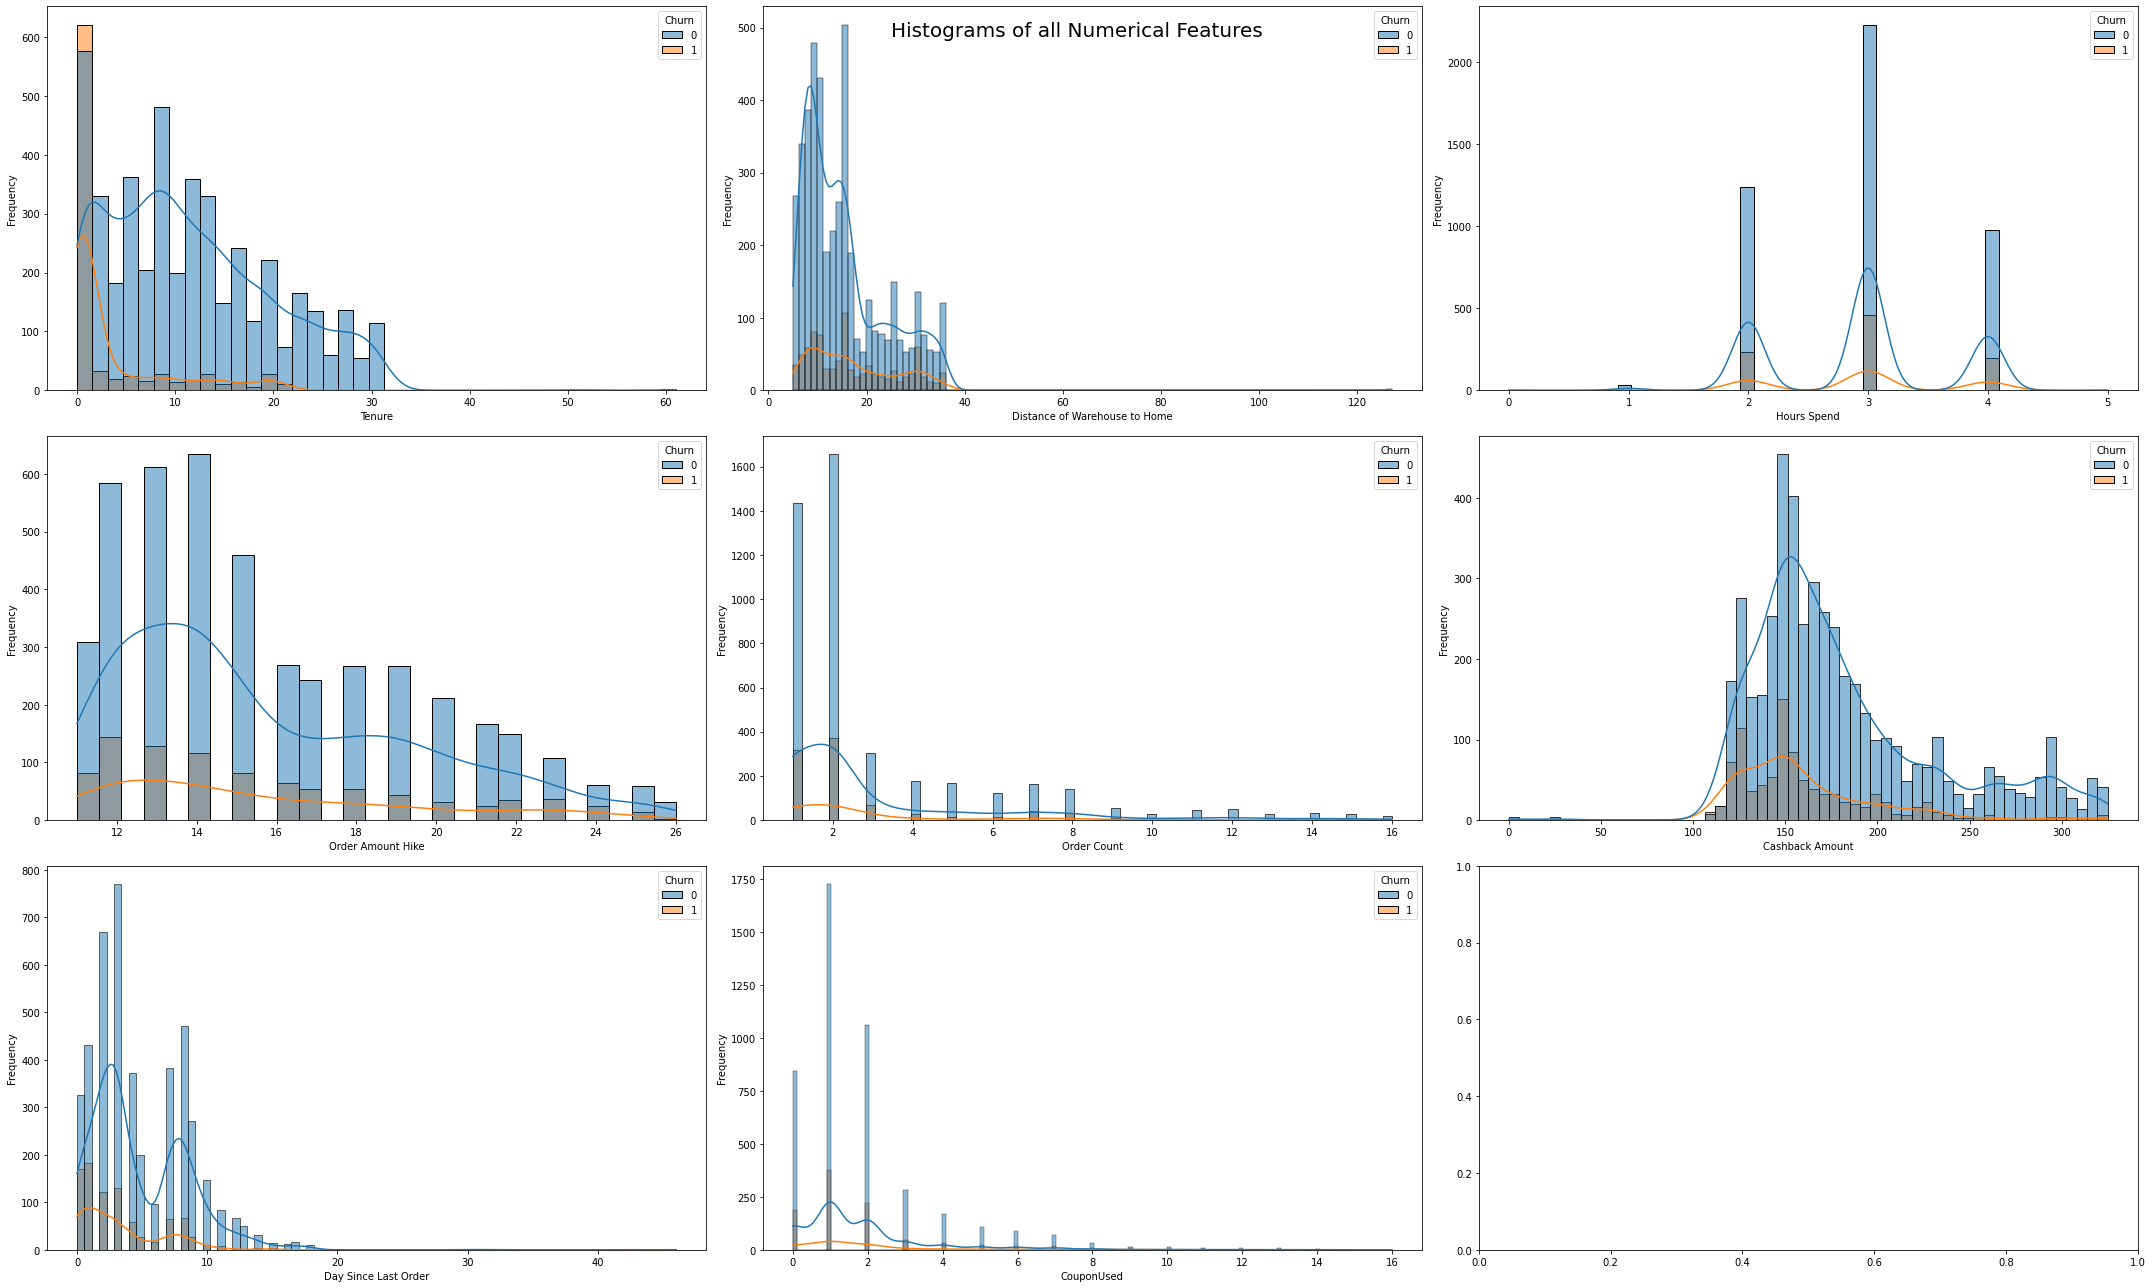

In [ ]:
fig, ax  = plt.subplots(3, 3, figsize=(30, 18))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = df['Tenure'], hue= df['Churn'], ax= ax[0][0],  kde= True)
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = df['WarehouseToHome'], hue= df['Churn'], ax= ax[0][1], kde= True)
ax2.set(xlabel= 'Distance of Warehouse to Home', ylabel= 'Frequency')

ax3 = sns.histplot(x = df['HourSpendOnApp'], hue= df['Churn'], ax= ax[0][2], kde= True)
ax3.set(xlabel= 'Hours Spend', ylabel= 'Frequency')

ax4 = sns.histplot(x = df['OrderAmountHikeFromlastYear'], hue= df['Churn'], ax= ax[1][0],  kde= True)
ax4.set(xlabel= 'Order Amount Hike', ylabel= 'Frequency')

ax5 = sns.histplot(x = df['OrderCount'], hue= df['Churn'], ax= ax[1][1], kde= True)
ax5.set(xlabel= 'Order Count', ylabel= 'Frequency')

ax6 = sns.histplot(x = df['CashbackAmount'], hue= df['Churn'], ax= ax[1][2], kde= True)
ax6.set(xlabel= 'Cashback Amount', ylabel= 'Frequency')

ax7 = sns.histplot(x = df['DaySinceLastOrder'], hue= df['Churn'], ax= ax[2][0], kde= True)
ax7.set(xlabel= 'Day Since Last Order', ylabel= 'Frequency')

ax8 = sns.histplot(x = df['CouponUsed'], hue= df['Churn'], ax= ax[2][1], kde= True)
ax8.set(xlabel= 'CouponUsed', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

##### Based on numerical features, it can be concluded that : 
#####1. More months the customer stays with the company, they are less likely to churn.
#####2.  Higher cashback amounts received by customers, they are less likely to churn.
#####3. Customers who spend 3 hours/day to surf the e-commerce platform are most likely to churn.
#####4. Customers who order most products in the e-commerce are less likely to churn.
#####5. People who don't buy products above 10 days since the last order are less likely to churn.
#####6. As order amount increases, customers are less likely to churn.

### **BIVARIATE ANALYSIS**

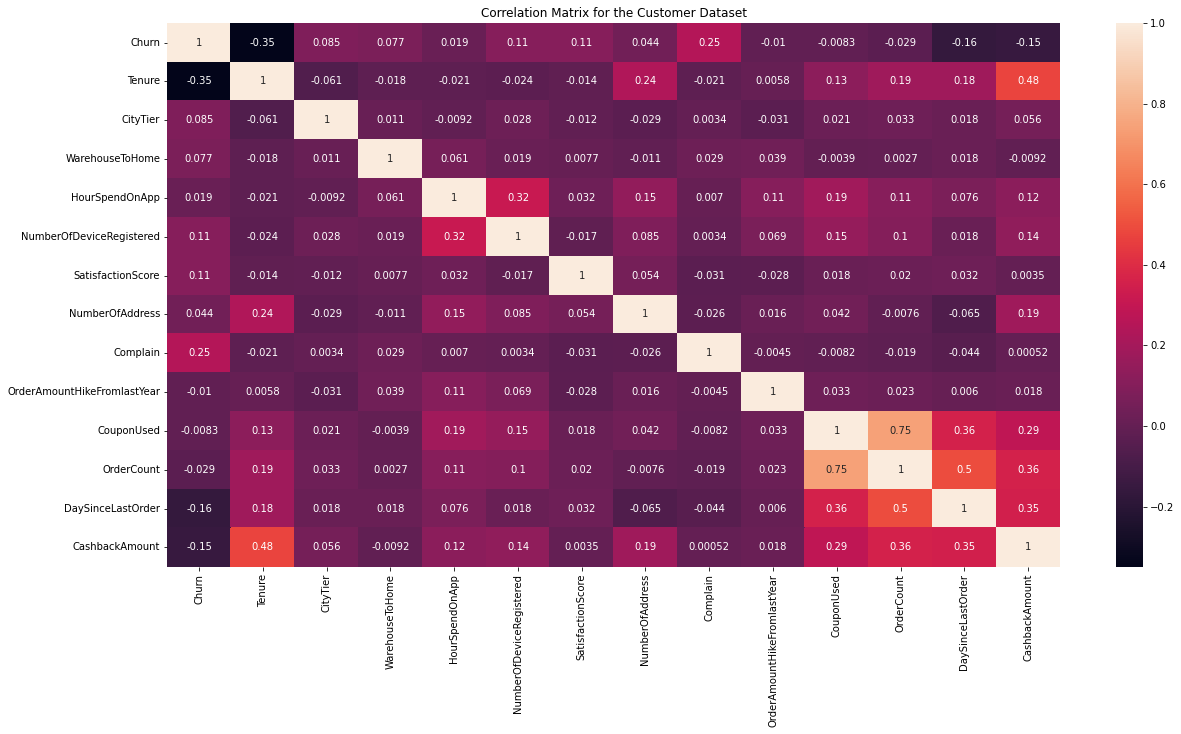

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()

##### As we can see that there is a positive correlation between tenure and the cashback amount, the coupon used is highly related to the order count, and there is also relationship between the order count and day since last order. Tenure and Complain have some effect on the churn but the rest of the variables are pretty neutral.

### **CHECKING MISSING VALUES**





In [ ]:
# Count the number of missing values
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
#count the total number of missing values in the dataset
print(f'Rows in the original dataframe: {df.shape[0]}')
#count the number of rows with missing values
print(f'The number of rows with missing values: {df[df.isnull().any(axis=1)].shape[0]}')

#percentage of missing values
miss = df.dropna()
miss_per = round((1-miss.shape[0]/df.shape[0])*100,2)

print(f'\nRemoving rows that contain NaN values has eliminated {miss_per}% of the data!')


Rows in the original dataframe: 5630
The number of rows with missing values: 1856

Removing rows that contain NaN values has eliminated 32.97% of the data!


##### There are 1,856 rows with missing values in this dataset. If all of the rows are removed, it will remove **32.97%** of the dataset which will lead to data loss. Thus, I will impute these values with Miss Forest Imputation technique. 

## **4. PREPROCESSING**

### **ENCODING**

##### There are several feature containing values with object dataype, so I will encode them before feeding them to the algorithms.

In [ ]:
enc = LabelEncoder()
for col in df.select_dtypes(include = 'object') :
  df[col] = enc.fit_transform(df[col])

### **HANDLING MISSING VALUES**

In [ ]:
imputer = MissForest()
df_imputed = imputer.fit_transform(df)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [ ]:
df = pd.DataFrame(df_imputed)
df.columns = ['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier', 'WarehouseToHome',
       'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

### **TRAIN-TEST-SPLIT**

In [ ]:
# Feature selection
X = df.drop('Churn', axis=1)
y = df['Churn']

# train-test split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

# Cross validation
cv=StratifiedKFold(n_splits=5)

Shape of X_train : (4504, 18)
Shape of X_test : (1126, 18)
Shape of y_train : (4504,)
Shape of y_test : (1126,)


### **FEATURE SCALING**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **5. MODEL BUILDING**

### **LOGISTIC REGRESSION**

In [ ]:
log = LogisticRegression()

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log, X_train, y_train, cv=cv, scoring = 'f1'))}")

Cross validation score for Logistic Regression: 0.5548173363700002


In [ ]:
def model_building(model, X_train = X_train, y_train = y_train, X_test = X_test, y_test =  y_test ) :
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  test_f1 = f1_score(y_test, y_pred)
  train_pred = model.predict(X_train)
  train_f1 = f1_score(y_train, train_pred)
  return y_pred, test_f1, train_f1

In [ ]:
log_pred, log_test, log_train = model_building(log)
print(f'Training score : {log_train}')
print(f'Testing Score : {log_test}')
print(classification_report(y_test, log_pred))

Training score : 0.5689655172413793
Testing Score : 0.6312292358803986
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       940
         1.0       0.83      0.51      0.63       186

    accuracy                           0.90      1126
   macro avg       0.87      0.74      0.79      1126
weighted avg       0.90      0.90      0.89      1126



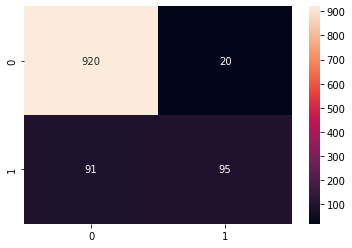

In [ ]:
# Confusion matrix
log_mat = confusion_matrix(y_test, log_pred)
sns.heatmap(log_mat, annot=True,fmt="g")
plt.show()

### **XGBOOST CLASSIFIER**

In [ ]:
xgb = XGBClassifier()

#cross validate logistic regression model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb, X_train, y_train, cv=cv, scoring = 'f1'))}")

Cross validation score for XGBoost: 0.724479122220532


In [ ]:
xgb_pred, xgb_test, xgb_train = model_building(xgb)
print(f'Training score : {xgb_train}')
print(f'Testing Score : {xgb_test}')
print(classification_report(y_test, xgb_pred))

Training score : 0.7567964731814842
Testing Score : 0.7
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       940
         1.0       0.84      0.60      0.70       186

    accuracy                           0.91      1126
   macro avg       0.88      0.79      0.83      1126
weighted avg       0.91      0.91      0.91      1126



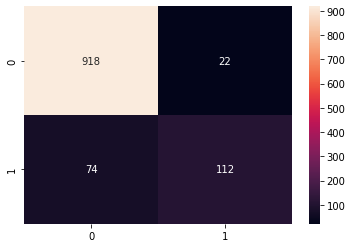

In [ ]:
# Confusion matrix
xgb_mat = confusion_matrix(y_test, xgb_pred)
sns.heatmap(xgb_mat, annot=True,fmt="g")
plt.show()

### **RANDOM FOREST**

In [ ]:
rf = RandomForestClassifier()

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf, X_train, y_train, cv=cv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8686929255746424


In [ ]:
rf_pred, rf_test, rf_train = model_building(rf)
print(f'Training score : {rf_train}')
print(f'Testing Score : {rf_test}')
print(classification_report(y_test, rf_pred))

Training score : 1.0
Testing Score : 0.9441340782122903
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       940
         1.0       0.98      0.91      0.94       186

    accuracy                           0.98      1126
   macro avg       0.98      0.95      0.97      1126
weighted avg       0.98      0.98      0.98      1126



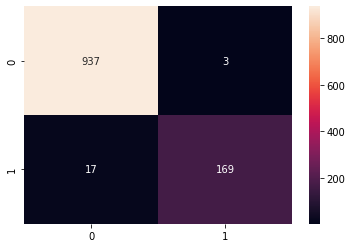

In [ ]:
# Confusion matrix
rf_mat = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

### **SUPPORT VECTOR MACHINE**

In [ ]:
svc = SVC()

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(svc, X_train, y_train, cv=cv, scoring='f1'))}")

Cross validation score for Random Forest: 0.6975828602769779


In [ ]:
svc_pred, svc_test, svc_train = model_building(svc)
print(f'Training score : {svc_train}')
print(f'Testing Score : {svc_test}')
print(classification_report(y_test, svc_pred))

Training score : 0.8131049888309754
Testing Score : 0.7385620915032679
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       940
         1.0       0.94      0.61      0.74       186

    accuracy                           0.93      1126
   macro avg       0.93      0.80      0.85      1126
weighted avg       0.93      0.93      0.92      1126



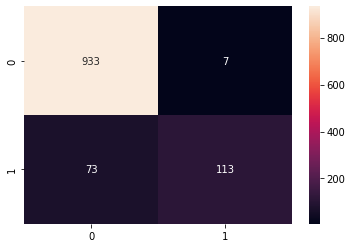

In [ ]:
# Confusion matrix
svc_mat = confusion_matrix(y_test, svc_pred)
sns.heatmap(svc_mat, annot=True,fmt="g")
plt.show()

### **ML MODEL COMPARISON**

In [ ]:
model_comparison = pd.DataFrame(columns = ['Model', 'Training Score', 'Testing Score'])
model_comparison = model_comparison.append({'Model' : 'Logistic Regression', 'Testing Score' : log_test, 'Training Score' : log_train}, ignore_index = True)
model_comparison = model_comparison.append({'Model' : 'XGBoost', 'Testing Score' : xgb_test, 'Training Score' : xgb_train}, ignore_index = True)
model_comparison = model_comparison.append({'Model' : 'Random Forest', 'Testing Score' : rf_test, 'Training Score' : rf_train}, ignore_index = True)
model_comparison = model_comparison.append({'Model' : 'SVC', 'Testing Score' : svc_test, 'Training Score' : svc_train}, ignore_index = True)
model_comparison

,Model,Training Score,Testing Score
0,Logistic Regression,0.568966,0.631229
1,XGBoost,0.756796,0.700000
2,Random Forest,1.000000,0.944134
3,SVC,0.813105,0.738562


In [ ]:
model_comparison = model_comparison.round(decimals = 3)
fig = make_subplots(rows = 1, cols = 2)
# Data for comparison of accuracy and training accuracy
test_acc = {'x' : model_comparison['Testing Score'], 'y' : model_comparison['Model']}

train_acc = {'x' : model_comparison['Training Score'], 'y' : model_comparison['Model']}

# Bar plot for model comparison
fig.add_trace(go.Bar(test_acc, name = 'Testing Accuracy Score', orientation = 'h', text=test_acc['x']), row =1, col =1)
fig.add_trace(go.Bar(train_acc, name = 'Training Accuracy Score', orientation = 'h', text = train_acc['x']), row =1, col =2)

# Settings
fig.update_traces(texttemplate='%{text}', textposition='inside')
fig.update_layout(title_text = 'Model Comparison', plot_bgcolor = 'white')

fig.show()

##### It can be seen that **Random Forest** has the best perfomance with the accuracy scores for training and testing are **1** and **0.944** respectively.

##### I want to know feature importances for these two models. 

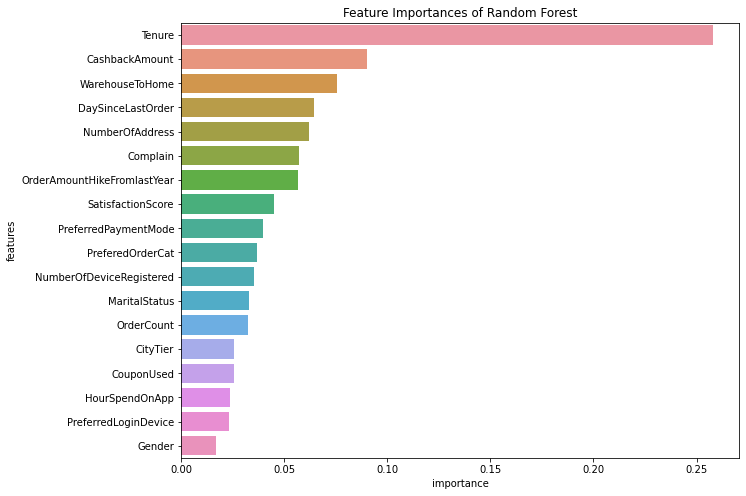

In [ ]:
feature_importance=pd.DataFrame(rf.feature_importances_, columns=['importance'])
feature_importance['features'] = df.drop('Churn', axis=1).columns

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature Importances of Random Forest')
plt.show()

##### **Tenure** and **cashback amount** are the most important features to predidct customer churn, while gender doesn't greatly affect the customer churn. Beside machine learning algorithms, I also want to try ANN.

### **ANN**

In [ ]:
def build_ann(hp):
  # Hyperparameter Tuning for ANN
  layer = hp.Int('layer', min_value = 1, max_value = 5)
  unit = hp.Int('unit', min_value = 1, max_value = 20)

  # Input layer
  model = Sequential()
  model.add(Input(shape = (X_train.shape[1],)))
   
  # Hidden layers
  for i in range(layer) :
    model.add(Dense(units=unit, activation = 'relu'))

  # Output Layer
  model.add(Dense(1, activation = 'sigmoid'))
  
  # Compile the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])                                       
  return model

In [ ]:
# Get the best hyperparameters
def best_model(tuner, df1, df2, df3, df4,  n_epochs=50) :
  tuner.search(df1, df2, epochs = n_epochs, validation_data = (df3, df4), verbose =1)
  best_model = tuner.get_best_models(num_models=1)
  model = best_model[0]
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  layer = best_hps.get('layer')
  unit = best_hps.get('unit')

  return model, layer, unit

def best_hps(layer, unit) :

  output = print(f"""The hyperparameter search is complete. The optimal number of layer is {layer}, , 
  the optimal number of units is {unit}""")

  return output

In [ ]:
bo = BayesianOptimization(build_ann, objective = 'val_loss', max_trials = 10, directory = 'bo', project_name = 'bayesian_opt')

In [ ]:
model, layer, unit = best_model(bo, X_train, y_train, X_test, y_test)

Trial 10 Complete [00h 00m 18s]
val_loss: 0.2687076926231384

Best val_loss So Far: 0.10332854092121124
Total elapsed time: 00h 03m 51s


In [ ]:
best_hps(layer, unit)

The hyperparameter search is complete. The optimal number of layer is 5, , 
  the optimal number of units is 20


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                380       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainabl

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1, validation_data = (X_test, y_test))

Epoch 1/100
141/141 [==============================] - 1s 4ms/step - loss: 0.0225 - accuracy: 0.9922 - val_loss: 0.1350 - val_accuracy: 0.9609
Epoch 2/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.1138 - val_accuracy: 0.9680
Epoch 3/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.1152 - val_accuracy: 0.9663
Epoch 4/100
141/141 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.1277 - val_accuracy: 0.9654
Epoch 5/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9947 - val_loss: 0.1630 - val_accuracy: 0.9520
Epoch 6/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9853 - val_loss: 0.1967 - val_accuracy: 0.9476
Epoch 7/100
141/141 [==============================] - 0s 3ms/step - loss: 0.0576 - accuracy: 0.9811 - val_loss: 0.1307 - val_accuracy: 0.9574

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)

36/36 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9698


In [ ]:
y_predict = np.argmax(model.predict(X_test), axis=1)

f1 = f1_score(y_test, y_predict, average='micro')
print(f'F1 score: {f1}')

F1 score: 0.8348134991119005
